In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks

import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import sys

seed = 0
np.random.seed(seed)
import tensorflow as tf

tf.random.set_seed(seed)
import os

# os.environ['PATH'] = os.environ['XILINX_VIVADO'] + '/bin:' + os.environ['PATH']




# Open training and testing data

In [13]:
sample_0 = np.load('toymc_0.npy')
sample_1 = np.load('toymc_1.npy')

label_train = sample_0[:,3]
sample_train = sample_0[:,0:3]
label_test = sample_1[:,3]
sample_test = sample_1[:,0:3]

# Take a look at the data

In [3]:
print(sample_0.shape)
print(sample_0)

(200000, 4)
[[23.86985207 14.16573715 26.58032227  1.        ]
 [24.1245327  14.7080183  29.22442627  1.        ]
 [26.01050377 16.43885231 31.09114075  1.        ]
 ...
 [29.36564064 36.59811401  6.9220295   0.        ]
 [11.34114552 43.26046753 40.03236008  0.        ]
 [11.05774593  3.0373764   4.73492575  0.        ]]


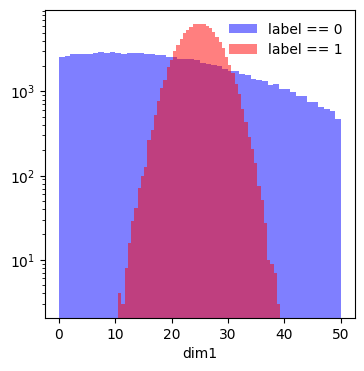

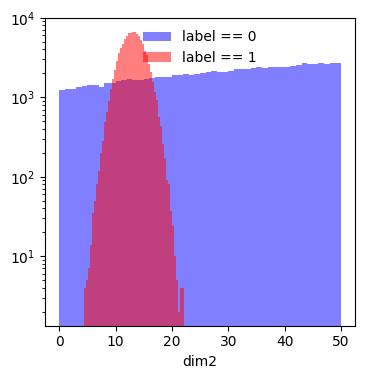

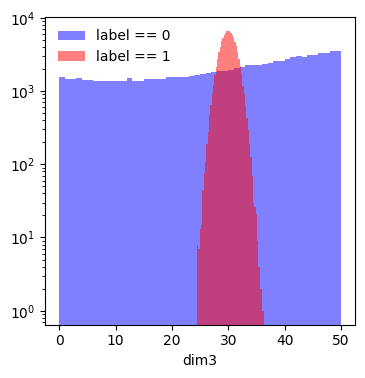

In [14]:
sig_dim1 = sample_0[:,0][(sample_0[:,3] > 0 )]
bkg_dim1 = sample_0[:,0][(sample_0[:,3] < 1 )]
sig_dim2 = sample_0[:,1][(sample_0[:,3] > 0 )]
bkg_dim2 = sample_0[:,1][(sample_0[:,3] < 1 )]
sig_dim3 = sample_0[:,2][(sample_0[:,3] > 0 )]
bkg_dim3 = sample_0[:,2][(sample_0[:,3] < 1 )]

plt.figure(figsize=(4,4))
plt.hist(bkg_dim1,log=True,bins=50,label='label == 0',alpha=0.5,color='blue')
plt.hist(sig_dim1,log=True,bins=50,label='label == 1',alpha=0.5,color='red')
plt.legend().get_frame().set_alpha(0)
plt.xlabel('dim1')
plt.show()


plt.figure(figsize=(4,4))
plt.hist(bkg_dim2,log=True,bins=50,label='label == 0',alpha=0.5,color='blue')
plt.hist(sig_dim2,log=True,bins=50,label='label == 1',alpha=0.5,color='red')
plt.legend().get_frame().set_alpha(0)
plt.xlabel('dim2')
plt.show()

plt.figure(figsize=(4,4))
plt.hist(bkg_dim3,log=True,bins=50,label='label == 0',alpha=0.5,color='blue')
plt.hist(sig_dim3,log=True,bins=50,label='label == 1',alpha=0.5,color='red')
plt.legend().get_frame().set_alpha(0)
plt.xlabel('dim3')
plt.show()


# Build model

In [15]:
model = Sequential()
model.add(Dense(16, input_shape=(3,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(32, name='fc4', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.001)))
model.add(Activation(activation='relu', name='relu4'))
model.add(Dense(1, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='sigmoid', name='sigmoid'))

/Users/yubo/anaconda3/envs/hls4ml-t/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Do training and save the result when the "Train" flag is true
# Or it will take the previous trained result

In [16]:
train = True
if train:
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss=['binary_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='my_model_1',
    )
    model.fit(
        sample_train,
        label_train,
        batch_size=1024,
        epochs=30,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
    )
else:
    from tensorflow.keras.models import load_model
    model = load_model('my_model_1/KERAS_check_best_model.keras')


Epoch 1/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 3:21 1s/step - accuracy: 0.3203 - loss: 6.4698
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 10/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3308 - loss: 6.1648 
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 20/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3336 - loss: 5.9019
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 30/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3346 - loss: 5.6538
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 40/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3343 - loss: 5.4152
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 50/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3335 - loss: 5.1804
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 60/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3321 - loss: 4.9512
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 70/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3324 - loss: 4.7321
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 80/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3388 - loss: 4.5282
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


 90/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3492 - loss: 4.3414
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


100/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3617 - loss: 4.1712
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


110/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3753 - loss: 4.0165
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


120/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3895 - loss: 3.8755
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


130/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4037 - loss: 3.7467
Epoch 1: saving model to my_model_1/KERAS_check_model_epoch01.h5


140/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4177 - loss: 3.6286
***callbacks***
saving losses to my_model_1/losses.log

Epoch 1: val_loss improved from inf to 0.87136, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 1: val_loss improved from inf to 0.87136, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 1: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 1: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4286 - loss: 3.5412 - val_accuracy: 0.7864 - val_loss: 0.8714 - learning_rate: 1.0000e-04
Epoch 2/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9277 - loss: 0.7181
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


  3/147 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9274 - loss: 0.7159
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 13/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9295 - loss: 0.7090
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 23/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9299 - loss: 0.7055 
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 33/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9299 - loss: 0.7029
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 43/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9301 - loss: 0.7002
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 53/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9302 - loss: 0.6978
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 63/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9303 - loss: 0.6955
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 73/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9303 - loss: 0.6934
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 83/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9303 - loss: 0.6914
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


 93/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9304 - loss: 0.6893
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


103/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9305 - loss: 0.6874
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


113/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9306 - loss: 0.6854
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


123/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9307 - loss: 0.6836
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


133/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9309 - loss: 0.6819
Epoch 2: saving model to my_model_1/KERAS_check_model_epoch02.h5


143/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9310 - loss: 0.6802
***callbacks***
saving losses to my_model_1/losses.log

Epoch 2: val_loss improved from 0.87136 to 0.77676, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 2: val_loss improved from 0.87136 to 0.77676, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 2: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 2: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9310 - loss: 0.6794 - val_accuracy: 0.8193 - val_loss: 0.7768 - learning_rate: 1.0000e-04
Epoch 3/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9385 - loss: 0.6255
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


  6/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9392 - loss: 0.6192
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 16/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9393 - loss: 0.6152 
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 26/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9390 - loss: 0.6141
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 36/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9389 - loss: 0.6132
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 46/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9389 - loss: 0.6121
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 56/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9390 - loss: 0.6111
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 66/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9391 - loss: 0.6101
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 76/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9391 - loss: 0.6093
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 86/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9392 - loss: 0.6085
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


 96/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9393 - loss: 0.6076
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


106/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9394 - loss: 0.6066
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


116/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9396 - loss: 0.6057
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


126/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9397 - loss: 0.6048
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


136/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9398 - loss: 0.6039
Epoch 3: saving model to my_model_1/KERAS_check_model_epoch03.h5


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9399 - loss: 0.6031
***callbacks***
saving losses to my_model_1/losses.log

Epoch 3: val_loss improved from 0.77676 to 0.71806, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 3: val_loss improved from 0.77676 to 0.71806, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 3: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 3: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9400 - loss: 0.6030 - val_accuracy: 0.8417 - val_loss: 0.7181 - learning_rate: 1.0000e-04
Epoch 4/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9424 - loss: 0.5790
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


  9/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9453 - loss: 0.5696 
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 19/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9460 - loss: 0.5669
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 29/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.5663
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 39/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.5654
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 49/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.5646
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 59/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.5639
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 69/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.5632
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 79/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.5626
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 89/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9459 - loss: 0.5620
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


 99/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9460 - loss: 0.5612
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


109/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9461 - loss: 0.5604
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


119/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9462 - loss: 0.5597
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


129/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9463 - loss: 0.5590
Epoch 4: saving model to my_model_1/KERAS_check_model_epoch04.h5


139/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9464 - loss: 0.5583
***callbacks***
saving losses to my_model_1/losses.log

Epoch 4: val_loss improved from 0.71806 to 0.67168, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 4: val_loss improved from 0.71806 to 0.67168, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 4: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 4: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9465 - loss: 0.5577 - val_accuracy: 0.8594 - val_loss: 0.6717 - learning_rate: 1.0000e-04
Epoch 5/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9434 - loss: 0.5409
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


  6/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9481 - loss: 0.5330
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 12/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9491 - loss: 0.5302
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 22/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9503 - loss: 0.5282 
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 32/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9507 - loss: 0.5276
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 42/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9510 - loss: 0.5268
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 52/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9512 - loss: 0.5260
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 62/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9513 - loss: 0.5254
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 72/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9514 - loss: 0.5248
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 82/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9515 - loss: 0.5244
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


 92/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9516 - loss: 0.5239
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


102/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9517 - loss: 0.5232
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


112/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9518 - loss: 0.5226
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


122/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9519 - loss: 0.5220
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


132/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9519 - loss: 0.5215
Epoch 5: saving model to my_model_1/KERAS_check_model_epoch05.h5


142/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9520 - loss: 0.5209
***callbacks***
saving losses to my_model_1/losses.log

Epoch 5: val_loss improved from 0.67168 to 0.63591, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 5: val_loss improved from 0.67168 to 0.63591, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 5: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 5: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9520 - loss: 0.5206 - val_accuracy: 0.8690 - val_loss: 0.6359 - learning_rate: 1.0000e-04
Epoch 6/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9463 - loss: 0.5107
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


  7/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9517 - loss: 0.5016 
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 15/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9532 - loss: 0.4989
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 25/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9538 - loss: 0.4980
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 35/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9541 - loss: 0.4973
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 45/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9544 - loss: 0.4966
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 55/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9546 - loss: 0.4959
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 65/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9547 - loss: 0.4954
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 75/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9548 - loss: 0.4949
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 85/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9548 - loss: 0.4946
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


 95/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9549 - loss: 0.4941
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


105/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9550 - loss: 0.4935
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


115/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.4930
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


125/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.4924
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


135/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9552 - loss: 0.4920
Epoch 6: saving model to my_model_1/KERAS_check_model_epoch06.h5


145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9553 - loss: 0.4915
***callbacks***
saving losses to my_model_1/losses.log

Epoch 6: val_loss improved from 0.63591 to 0.60436, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 6: val_loss improved from 0.63591 to 0.60436, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 6: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 6: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9553 - loss: 0.4914 - val_accuracy: 0.8798 - val_loss: 0.6044 - learning_rate: 1.0000e-04
Epoch 7/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.9521 - loss: 0.4843
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


  8/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9552 - loss: 0.4745
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 18/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9570 - loss: 0.4721 
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 28/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9575 - loss: 0.4715
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 38/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9579 - loss: 0.4707
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 48/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9581 - loss: 0.4700
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 58/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9583 - loss: 0.4693
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 68/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9584 - loss: 0.4688
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 78/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9585 - loss: 0.4684
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 88/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9585 - loss: 0.4680
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


 98/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9586 - loss: 0.4675
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


108/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9587 - loss: 0.4670
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


118/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9587 - loss: 0.4665
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


128/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9588 - loss: 0.4660
Epoch 7: saving model to my_model_1/KERAS_check_model_epoch07.h5


138/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9588 - loss: 0.4656
***callbacks***
saving losses to my_model_1/losses.log

Epoch 7: val_loss improved from 0.60436 to 0.57646, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 7: val_loss improved from 0.60436 to 0.57646, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 7: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 7: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9589 - loss: 0.4652 - val_accuracy: 0.8901 - val_loss: 0.5765 - learning_rate: 1.0000e-04
Epoch 8/30

Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


  1/147 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.9561 - loss: 0.4601
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 11/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9582 - loss: 0.4500 
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 21/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9597 - loss: 0.4482
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 31/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9602 - loss: 0.4478
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 41/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9606 - loss: 0.4470
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 51/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9608 - loss: 0.4463
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 61/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9610 - loss: 0.4458
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 71/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9610 - loss: 0.4454
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 81/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9611 - loss: 0.4451
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


 91/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9611 - loss: 0.4447
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


101/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9612 - loss: 0.4443
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


111/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9613 - loss: 0.4438
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


121/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9614 - loss: 0.4434
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


131/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9614 - loss: 0.4430
Epoch 8: saving model to my_model_1/KERAS_check_model_epoch08.h5


141/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9615 - loss: 0.4426
***callbacks***
saving losses to my_model_1/losses.log

Epoch 8: val_loss improved from 0.57646 to 0.55306, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 8: val_loss improved from 0.57646 to 0.55306, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 8: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 8: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9615 - loss: 0.4423 - val_accuracy: 0.8975 - val_loss: 0.5531 - learning_rate: 1.0000e-04
Epoch 9/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9600 - loss: 0.4393
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9607 - loss: 0.4325
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 14/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9621 - loss: 0.4286 
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 24/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9628 - loss: 0.4277
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 34/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9630 - loss: 0.4272
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 44/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9632 - loss: 0.4265
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 54/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9634 - loss: 0.4258
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 64/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9635 - loss: 0.4253
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 74/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9635 - loss: 0.4250
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 84/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9635 - loss: 0.4248
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


 94/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9636 - loss: 0.4244
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


104/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9636 - loss: 0.4240
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


114/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9637 - loss: 0.4235
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


124/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9637 - loss: 0.4231
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


134/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9638 - loss: 0.4228
Epoch 9: saving model to my_model_1/KERAS_check_model_epoch09.h5


144/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9638 - loss: 0.4224
***callbacks***
saving losses to my_model_1/losses.log

Epoch 9: val_loss improved from 0.55306 to 0.53392, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 9: val_loss improved from 0.55306 to 0.53392, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 9: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 9: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9638 - loss: 0.4223 - val_accuracy: 0.9029 - val_loss: 0.5339 - learning_rate: 1.0000e-04
Epoch 10/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9619 - loss: 0.4211
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


  7/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9631 - loss: 0.4121 
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 17/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9640 - loss: 0.4101
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 27/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9643 - loss: 0.4096
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 37/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9645 - loss: 0.4090
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 47/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9646 - loss: 0.4083
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 57/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9647 - loss: 0.4077
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 67/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9648 - loss: 0.4073
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 77/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9648 - loss: 0.4070
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 87/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9648 - loss: 0.4068
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


 97/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9648 - loss: 0.4065
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


107/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9649 - loss: 0.4061
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


117/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9649 - loss: 0.4057
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


127/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9650 - loss: 0.4053
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


137/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9650 - loss: 0.4050
Epoch 10: saving model to my_model_1/KERAS_check_model_epoch10.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9651 - loss: 0.4047
***callbacks***
saving losses to my_model_1/losses.log

Epoch 10: val_loss improved from 0.53392 to 0.51698, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 10: val_loss improved from 0.53392 to 0.51698, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 10: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 10: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9651 - loss: 0.4046 - val_accuracy: 0.9074 - val_loss: 0.5170 - learning_rate: 1.0000e-04
Epoch 11/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9629 - loss: 0.4051
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 10/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9643 - loss: 0.3951 
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 20/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9651 - loss: 0.3939
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 30/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9654 - loss: 0.3936
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 40/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9657 - loss: 0.3929
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 50/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9658 - loss: 0.3922
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 60/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9659 - loss: 0.3917
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 70/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9660 - loss: 0.3913
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 80/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9660 - loss: 0.3912
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


 90/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9660 - loss: 0.3909
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


100/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9661 - loss: 0.3906
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


110/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9661 - loss: 0.3902
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


120/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9662 - loss: 0.3898
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


130/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9662 - loss: 0.3895
Epoch 11: saving model to my_model_1/KERAS_check_model_epoch11.h5


140/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9663 - loss: 0.3892
***callbacks***
saving losses to my_model_1/losses.log

Epoch 11: val_loss improved from 0.51698 to 0.50236, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 11: val_loss improved from 0.51698 to 0.50236, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 11: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 11: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9663 - loss: 0.3889 - val_accuracy: 0.9103 - val_loss: 0.5024 - learning_rate: 1.0000e-04
Epoch 12/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9648 - loss: 0.3908
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9653 - loss: 0.3837
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 13/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9657 - loss: 0.3804
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 23/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9661 - loss: 0.3796 
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 33/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9662 - loss: 0.3792
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 43/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9664 - loss: 0.3785
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 53/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9665 - loss: 0.3779
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 63/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9666 - loss: 0.3774
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 73/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9666 - loss: 0.3771
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 83/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9666 - loss: 0.3770
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


 93/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9666 - loss: 0.3767
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


103/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9667 - loss: 0.3764
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


113/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9667 - loss: 0.3760
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


123/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.3757
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


133/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.3754
Epoch 12: saving model to my_model_1/KERAS_check_model_epoch12.h5


143/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9668 - loss: 0.3751
***callbacks***
saving losses to my_model_1/losses.log

Epoch 12: val_loss improved from 0.50236 to 0.48930, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 12: val_loss improved from 0.50236 to 0.48930, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 12: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 12: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9669 - loss: 0.3749 - val_accuracy: 0.9124 - val_loss: 0.4893 - learning_rate: 1.0000e-04
Epoch 13/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9678 - loss: 0.3782
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


  6/147 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9671 - loss: 0.3700
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 16/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9671 - loss: 0.3672
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 26/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9670 - loss: 0.3668 
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 36/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9670 - loss: 0.3663
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 46/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9671 - loss: 0.3656
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 56/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9672 - loss: 0.3650
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 66/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9672 - loss: 0.3646
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 76/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9672 - loss: 0.3644
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 86/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9672 - loss: 0.3643
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


 96/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9672 - loss: 0.3640
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


106/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9672 - loss: 0.3637
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


116/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9673 - loss: 0.3633
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


126/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9673 - loss: 0.3630
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


136/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.3627
Epoch 13: saving model to my_model_1/KERAS_check_model_epoch13.h5


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.3625
***callbacks***
saving losses to my_model_1/losses.log

Epoch 13: val_loss improved from 0.48930 to 0.47807, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 13: val_loss improved from 0.48930 to 0.47807, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 13: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 13: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9674 - loss: 0.3624 - val_accuracy: 0.9143 - val_loss: 0.4781 - learning_rate: 1.0000e-04
Epoch 14/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9678 - loss: 0.3671
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


  9/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9676 - loss: 0.3568 
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 19/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9675 - loss: 0.3558
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 29/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9674 - loss: 0.3555
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 39/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.3548
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 49/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.3541
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 59/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.3537
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 69/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9676 - loss: 0.3533
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 79/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.3532
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 89/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9675 - loss: 0.3530
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


 99/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9676 - loss: 0.3527
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


109/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9676 - loss: 0.3524
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


119/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9676 - loss: 0.3521
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


129/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9677 - loss: 0.3518
Epoch 14: saving model to my_model_1/KERAS_check_model_epoch14.h5


139/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9677 - loss: 0.3516
***callbacks***
saving losses to my_model_1/losses.log

Epoch 14: val_loss improved from 0.47807 to 0.46773, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 14: val_loss improved from 0.47807 to 0.46773, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 14: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 14: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9677 - loss: 0.3514 - val_accuracy: 0.9158 - val_loss: 0.4677 - learning_rate: 1.0000e-04
Epoch 15/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9678 - loss: 0.3574
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


  4/147 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9676 - loss: 0.3503
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 12/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9677 - loss: 0.3465
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 22/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9677 - loss: 0.3457 
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 32/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9676 - loss: 0.3454
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 42/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9677 - loss: 0.3447
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 52/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9678 - loss: 0.3441
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 62/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.3437
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 72/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.3434
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 82/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.3433
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


 92/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.3431
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


102/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.3428
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


112/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9679 - loss: 0.3425
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


122/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9679 - loss: 0.3422
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


136/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9680 - loss: 0.3418
Epoch 15: saving model to my_model_1/KERAS_check_model_epoch15.h5


142/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9680 - loss: 0.3417
***callbacks***
saving losses to my_model_1/losses.log

Epoch 15: val_loss improved from 0.46773 to 0.45909, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 15: val_loss improved from 0.46773 to 0.45909, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 15: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 15: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9680 - loss: 0.3416 - val_accuracy: 0.9168 - val_loss: 0.4591 - learning_rate: 1.0000e-04
Epoch 16/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9678 - loss: 0.3487
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9680 - loss: 0.3409
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 15/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9682 - loss: 0.3372
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 25/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9681 - loss: 0.3368 
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 35/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9681 - loss: 0.3363
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 45/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9681 - loss: 0.3356
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 55/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3351
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 65/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3347
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 75/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3345
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 85/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9681 - loss: 0.3344
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


 95/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9681 - loss: 0.3342
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


105/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3339
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


115/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3336
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


125/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3334
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


135/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3331
Epoch 16: saving model to my_model_1/KERAS_check_model_epoch16.h5


145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9683 - loss: 0.3329
***callbacks***
saving losses to my_model_1/losses.log

Epoch 16: val_loss improved from 0.45909 to 0.45128, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 16: val_loss improved from 0.45909 to 0.45128, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 16: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 16: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9683 - loss: 0.3329 - val_accuracy: 0.9177 - val_loss: 0.4513 - learning_rate: 1.0000e-04
Epoch 17/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9678 - loss: 0.3410
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


  8/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9684 - loss: 0.3303 
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 18/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9682 - loss: 0.3291
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 28/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9681 - loss: 0.3289
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 38/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3283
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 48/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9682 - loss: 0.3276
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 58/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3271
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 68/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3268
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 78/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3267
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 88/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3266
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


 98/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3264
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


108/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9683 - loss: 0.3261
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


118/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9684 - loss: 0.3258
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


128/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9684 - loss: 0.3256
Epoch 17: saving model to my_model_1/KERAS_check_model_epoch17.h5


138/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9684 - loss: 0.3253
***callbacks***
saving losses to my_model_1/losses.log

Epoch 17: val_loss improved from 0.45128 to 0.44360, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 17: val_loss improved from 0.45128 to 0.44360, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 17: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 17: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9685 - loss: 0.3252 - val_accuracy: 0.9184 - val_loss: 0.4436 - learning_rate: 1.0000e-04
Epoch 18/30

Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


  1/147 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9668 - loss: 0.3339
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 11/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9681 - loss: 0.3229 
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 21/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9681 - loss: 0.3220 
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 31/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9681 - loss: 0.3218
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 41/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9682 - loss: 0.3211
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 51/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9683 - loss: 0.3205
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 61/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3201
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 71/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3198
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 81/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3197
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


 91/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3196
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


101/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3194
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


111/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.3191
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


121/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.3188
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


131/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3186
Epoch 18: saving model to my_model_1/KERAS_check_model_epoch18.h5


141/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3184
***callbacks***
saving losses to my_model_1/losses.log

Epoch 18: val_loss improved from 0.44360 to 0.43607, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 18: val_loss improved from 0.44360 to 0.43607, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 18: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 18: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9686 - loss: 0.3183 - val_accuracy: 0.9193 - val_loss: 0.4361 - learning_rate: 1.0000e-04
Epoch 19/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.9658 - loss: 0.3277
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


  4/147 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9675 - loss: 0.3205
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 14/147 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9682 - loss: 0.3163
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 24/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9683 - loss: 0.3158
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 34/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9684 - loss: 0.3154
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 44/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9685 - loss: 0.3147
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 54/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3142
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 64/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3138
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 74/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3137
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 84/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3136
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


 94/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3134
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


104/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3132
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


114/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.3129
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


124/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.3127
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


134/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9687 - loss: 0.3125
Epoch 19: saving model to my_model_1/KERAS_check_model_epoch19.h5


144/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.3123
***callbacks***
saving losses to my_model_1/losses.log

Epoch 19: val_loss improved from 0.43607 to 0.42942, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 19: val_loss improved from 0.43607 to 0.42942, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 19: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 19: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9688 - loss: 0.3123 - val_accuracy: 0.9198 - val_loss: 0.4294 - learning_rate: 1.0000e-04
Epoch 20/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9658 - loss: 0.3222
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


  7/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9679 - loss: 0.3123
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 17/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9682 - loss: 0.3106 
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 27/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9683 - loss: 0.3103
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 37/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9684 - loss: 0.3098
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 47/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.3092
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 57/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3087
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 67/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3084
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 77/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3083
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 87/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3082
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


 97/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3081
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


107/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3078
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


117/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3076
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


127/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3074
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


137/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3072
Epoch 20: saving model to my_model_1/KERAS_check_model_epoch20.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.3070
***callbacks***
saving losses to my_model_1/losses.log

Epoch 20: val_loss improved from 0.42942 to 0.42398, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 20: val_loss improved from 0.42942 to 0.42398, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 20: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 20: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9688 - loss: 0.3070 - val_accuracy: 0.9202 - val_loss: 0.4240 - learning_rate: 1.0000e-04
Epoch 21/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9658 - loss: 0.3176
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 10/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9681 - loss: 0.3067 
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 20/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9683 - loss: 0.3058
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 30/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9683 - loss: 0.3056
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 40/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.3050
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 50/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9685 - loss: 0.3044
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 60/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3040
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 70/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3038
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 80/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3038
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


 90/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3036
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


100/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.3035
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


110/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3032
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


120/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3030
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


130/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9687 - loss: 0.3028
Epoch 21: saving model to my_model_1/KERAS_check_model_epoch21.h5


140/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.3027
***callbacks***
saving losses to my_model_1/losses.log

Epoch 21: val_loss improved from 0.42398 to 0.41912, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 21: val_loss improved from 0.42398 to 0.41912, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 21: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 21: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9688 - loss: 0.3026 - val_accuracy: 0.9208 - val_loss: 0.4191 - learning_rate: 1.0000e-04
Epoch 22/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9658 - loss: 0.3138
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


  3/147 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9666 - loss: 0.3077
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 13/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9681 - loss: 0.3026
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 23/147 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9683 - loss: 0.3020
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 33/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9684 - loss: 0.3017
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 43/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9685 - loss: 0.3010
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 53/147 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9686 - loss: 0.3005
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 63/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9687 - loss: 0.3002 
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 73/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9687 - loss: 0.3000
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 83/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9686 - loss: 0.3000
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


 93/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9686 - loss: 0.2998
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


103/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9687 - loss: 0.2997
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


113/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9687 - loss: 0.2994
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


123/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.2992
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


133/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9688 - loss: 0.2991
Epoch 22: saving model to my_model_1/KERAS_check_model_epoch22.h5


143/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9688 - loss: 0.2989
***callbacks***
saving losses to my_model_1/losses.log

Epoch 22: val_loss improved from 0.41912 to 0.41412, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 22: val_loss improved from 0.41912 to 0.41412, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 22: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 22: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9688 - loss: 0.2988 - val_accuracy: 0.9214 - val_loss: 0.4141 - learning_rate: 1.0000e-04
Epoch 23/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9668 - loss: 0.3101
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


  6/147 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9682 - loss: 0.3014
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 16/147 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9686 - loss: 0.2986
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 26/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9687 - loss: 0.2984
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 36/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.2980
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 46/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2974 
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 56/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2969
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 66/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2966
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 76/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2965
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 86/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2965
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


 96/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9689 - loss: 0.2964
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


106/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9689 - loss: 0.2962
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


116/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2959
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


126/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2958
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


136/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2956
Epoch 23: saving model to my_model_1/KERAS_check_model_epoch23.h5


146/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2955
***callbacks***
saving losses to my_model_1/losses.log

Epoch 23: val_loss improved from 0.41412 to 0.40829, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 23: val_loss improved from 0.41412 to 0.40829, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 23: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 23: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9690 - loss: 0.2954 - val_accuracy: 0.9221 - val_loss: 0.4083 - learning_rate: 1.0000e-04
Epoch 24/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9668 - loss: 0.3067
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


  9/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9686 - loss: 0.2963 
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 19/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9687 - loss: 0.2953
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 29/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.2951
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 39/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2945
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 49/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2940
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 59/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2936
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 69/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2933
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 79/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2933
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 89/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9689 - loss: 0.2932
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


 99/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2931
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


109/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2929
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


119/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2926
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


129/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2925
Epoch 24: saving model to my_model_1/KERAS_check_model_epoch24.h5


139/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2923
***callbacks***
saving losses to my_model_1/losses.log

Epoch 24: val_loss improved from 0.40829 to 0.40307, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 24: val_loss improved from 0.40829 to 0.40307, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 24: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 24: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9691 - loss: 0.2922 - val_accuracy: 0.9229 - val_loss: 0.4031 - learning_rate: 1.0000e-04
Epoch 25/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9658 - loss: 0.3034
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9676 - loss: 0.2960
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 12/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9685 - loss: 0.2928
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 22/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.2921 
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 32/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.2919
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 42/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9689 - loss: 0.2913
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 52/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2907
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 62/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2904
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 72/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2902
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 82/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2902
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


 92/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2901
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


102/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2899
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


112/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2897
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


122/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2895
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


132/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2894
Epoch 25: saving model to my_model_1/KERAS_check_model_epoch25.h5


142/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2892
***callbacks***
saving losses to my_model_1/losses.log

Epoch 25: val_loss improved from 0.40307 to 0.39796, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 25: val_loss improved from 0.40307 to 0.39796, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 25: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 25: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9692 - loss: 0.2891 - val_accuracy: 0.9235 - val_loss: 0.3980 - learning_rate: 1.0000e-04
Epoch 26/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9648 - loss: 0.3004
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9673 - loss: 0.2931
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 15/147 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9685 - loss: 0.2895
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 25/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.2892
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 35/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9689 - loss: 0.2888 
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 45/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9690 - loss: 0.2882
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 55/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2877
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 65/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9691 - loss: 0.2874
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 75/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2873
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 85/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2873
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


 95/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2872
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


105/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2870
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


115/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.2868
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


125/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.2866
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


135/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.2864
Epoch 26: saving model to my_model_1/KERAS_check_model_epoch26.h5


145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2863
***callbacks***
saving losses to my_model_1/losses.log

Epoch 26: val_loss improved from 0.39796 to 0.39414, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 26: val_loss improved from 0.39796 to 0.39414, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 26: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 26: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9693 - loss: 0.2862 - val_accuracy: 0.9238 - val_loss: 0.3941 - learning_rate: 1.0000e-04
Epoch 27/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9648 - loss: 0.2972
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


  8/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9684 - loss: 0.2876 
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 18/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9688 - loss: 0.2865
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 28/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9690 - loss: 0.2863
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 38/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9691 - loss: 0.2858
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 48/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2852
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 58/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2848
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 68/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2846
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 78/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2845
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 88/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2845
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


 98/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2843
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


108/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2841
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


118/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.2839
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


128/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.2838
Epoch 27: saving model to my_model_1/KERAS_check_model_epoch27.h5


138/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9694 - loss: 0.2836
***callbacks***
saving losses to my_model_1/losses.log

Epoch 27: val_loss improved from 0.39414 to 0.38759, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 27: val_loss improved from 0.39414 to 0.38759, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 27: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 27: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9694 - loss: 0.2835 - val_accuracy: 0.9246 - val_loss: 0.3876 - learning_rate: 1.0000e-04
Epoch 28/30

Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


  1/147 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9648 - loss: 0.2940
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 11/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9686 - loss: 0.2845 
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 21/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.2837
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 31/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.2836
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 41/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9691 - loss: 0.2829
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 51/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2824
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 61/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2821
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 71/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2819
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 81/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2819
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


 91/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2818
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


101/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9692 - loss: 0.2816
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


111/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2814
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


121/147 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.2812
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


131/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2810
Epoch 28: saving model to my_model_1/KERAS_check_model_epoch28.h5


141/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2809
***callbacks***
saving losses to my_model_1/losses.log

Epoch 28: val_loss improved from 0.38759 to 0.38196, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 28: val_loss improved from 0.38759 to 0.38196, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 28: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 28: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9694 - loss: 0.2808 - val_accuracy: 0.9251 - val_loss: 0.3820 - learning_rate: 1.0000e-04
Epoch 29/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9648 - loss: 0.2910
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


  5/147 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9675 - loss: 0.2849
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 14/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9686 - loss: 0.2816
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 24/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9689 - loss: 0.2812
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 34/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9690 - loss: 0.2809
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 44/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2803 
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 54/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2798
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 64/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9693 - loss: 0.2795
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 74/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9693 - loss: 0.2793
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 84/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2793
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


 94/147 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9692 - loss: 0.2792
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


104/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.2790
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


114/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2788
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


124/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2786
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


134/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2785
Epoch 29: saving model to my_model_1/KERAS_check_model_epoch29.h5


144/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2784
***callbacks***
saving losses to my_model_1/losses.log

Epoch 29: val_loss improved from 0.38196 to 0.37705, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 29: val_loss improved from 0.38196 to 0.37705, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 29: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 29: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9694 - loss: 0.2783 - val_accuracy: 0.9256 - val_loss: 0.3771 - learning_rate: 1.0000e-04
Epoch 30/30
  1/147 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9648 - loss: 0.2878
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


  7/147 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9687 - loss: 0.2802 
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 17/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9691 - loss: 0.2789
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 27/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9692 - loss: 0.2787
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 37/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.2783
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 47/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2777
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 57/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2773
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 67/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.2770
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 77/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2770
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 87/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2769
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


 97/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2768
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


107/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2766
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


117/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9694 - loss: 0.2764
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


127/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.2762
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


137/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.2761
Epoch 30: saving model to my_model_1/KERAS_check_model_epoch30.h5


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9695 - loss: 0.2760
***callbacks***
saving losses to my_model_1/losses.log

Epoch 30: val_loss improved from 0.37705 to 0.37324, saving model to my_model_1/KERAS_check_best_model.h5



Epoch 30: val_loss improved from 0.37705 to 0.37324, saving model to my_model_1/KERAS_check_best_model.weights.h5

Epoch 30: saving model to my_model_1/KERAS_check_model_last.h5



Epoch 30: saving model to my_model_1/KERAS_check_model_last.weights.h5

***callbacks end***

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9695 - loss: 0.2759 - val_accuracy: 0.9259 - val_loss: 0.3732 - learning_rate: 1.0000e-04


# Process the testing sample

In [5]:
y_keras = model.predict(sample_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 768us/step


# Check the testing result with a cut on 0.5 and compraing to the expected label

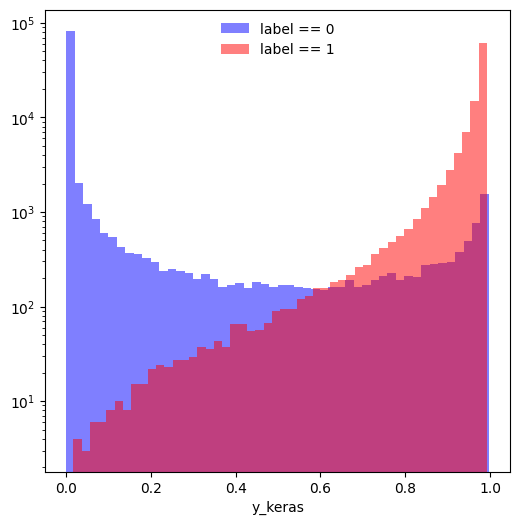

In [6]:
y_keras_sig = y_keras[ (label_test > 0 ) ]
y_keras_bkg = y_keras[ (label_test < 1) ]

plt.figure(figsize=(6,6))
plt.hist(y_keras_bkg,log=True,bins=50,label='label == 0',alpha=0.5,color='blue')
plt.hist(y_keras_sig,log=True,bins=50,label='label == 1',alpha=0.5,color='red')
plt.legend().get_frame().set_alpha(0)
plt.xlabel('y_keras')
plt.show()

Accuracy: 95.95%


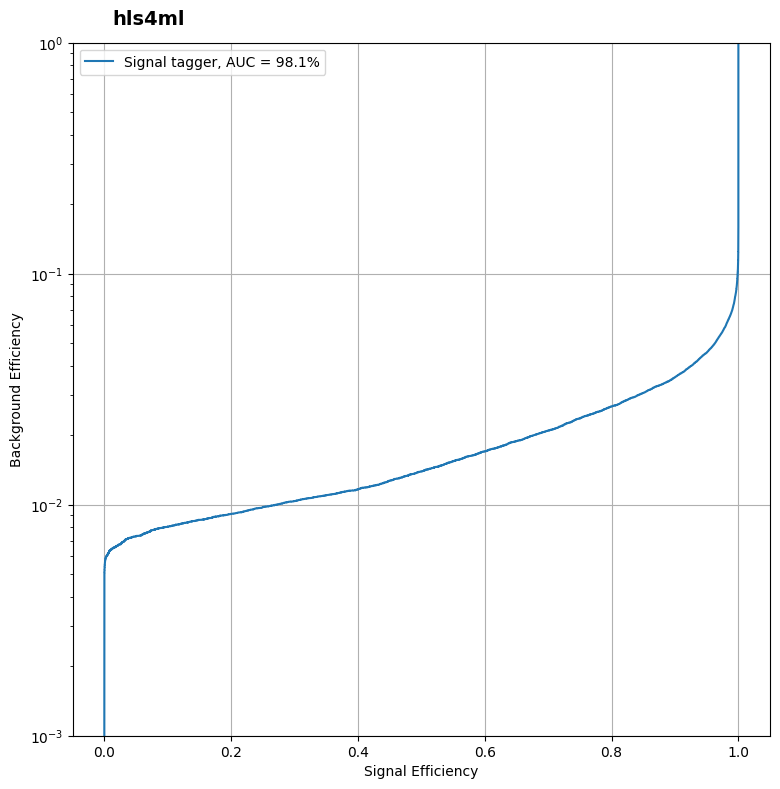

In [7]:
y_pred_binary = (y_keras > 0.5).astype(int)
accuracy = accuracy_score(label_test, y_pred_binary)
print("Accuracy: {:.2f}%".format(accuracy * 100))

label_test_reshape = label_test.reshape(len(label_test),1)
plt.figure(figsize=(9, 9))
_ = plotting.makeRoc(label_test_reshape, y_keras, ['Signal'])
plt.show()

# Build hls4ml model

In [17]:
# To create the text files to be used in later HLS Csimulation
import csv

with open('my_model_1/Input.dat', 'w') as f:
    csv.writer(f, delimiter=' ').writerows(sample_test)

with open('my_model_1/Output.dat', 'w') as f:
    csv.writer(f, delimiter=' ').writerows(y_keras)


In [18]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='model')
plotting.print_dict(config)
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='my_model_1/hls4ml_prj', part='xc7a200tsbg484-1',
    input_data_tb = "my_model_1/Input.dat",
    output_data_tb = "my_model_1/Output.dat"
)
# "part" is the FPGA part of the Nexys video card
# By default, it will use Vivado HLS for backend
# If you use newer version of Xilinx software, you need to include backend='Vitis' in the argument to use Vitis HLS.
# Use io_type="io_parallel" in the argument to input all the bits in parallel

Interpreting Sequential
Topology:


KeyError: 'batch_input_shape'

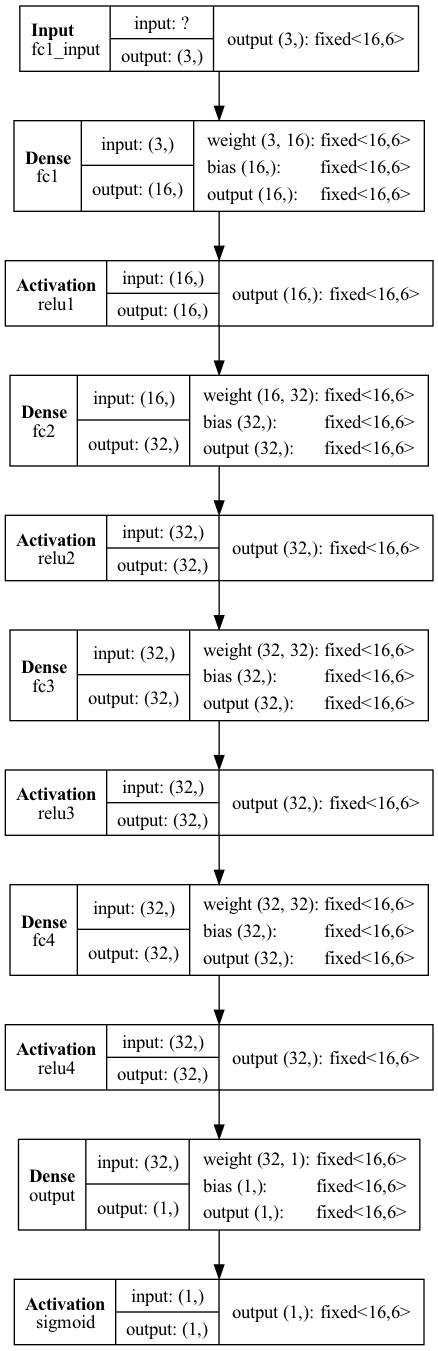

In [26]:
# This is to show the hls4ml model structure
from IPython.display import Image
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file='hls_model.png')
Image('hls_model.png')

In [27]:
# Compile it
hls_model.compile()

Writing HLS project
Done


# Process the testing data with hls4ml model and see the performance

Accuracy Keras: 95.80%
Accuracy HLS: 48.10%


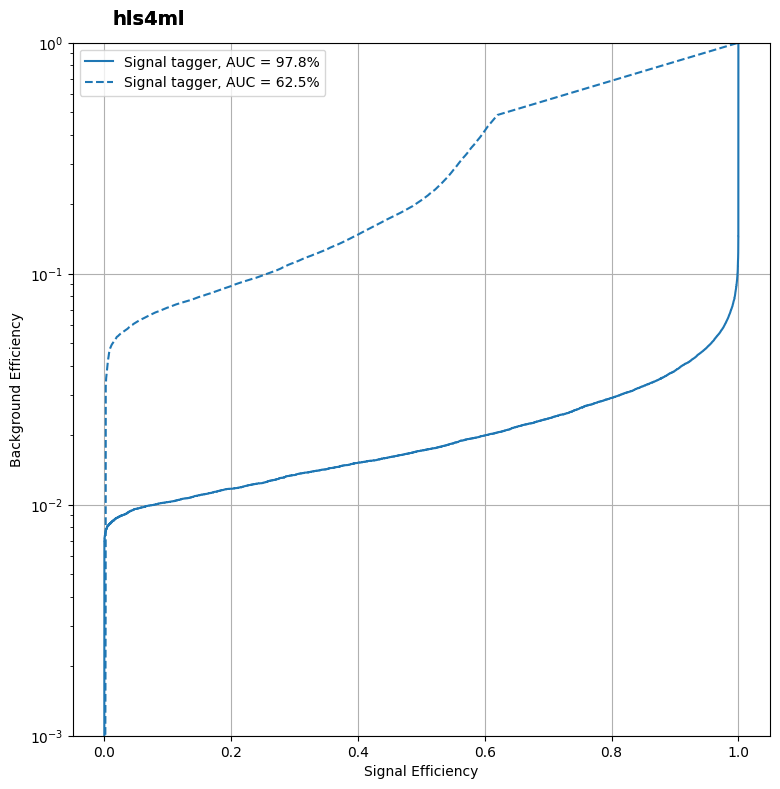

In [28]:
y_hls = hls_model.predict(np.ascontiguousarray(sample_test))

y_pred_binary_hls = (y_hls > 0.5).astype(int)
accuracy_hls = accuracy_score(label_test, y_pred_binary_hls)
print("Accuracy Keras: {:.2f}%".format(accuracy * 100))
print("Accuracy HLS: {:.2f}%".format(accuracy_hls * 100))

import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
_ = plotting.makeRoc(label_test_reshape, y_keras, ['Signal'])
plt.gca().set_prop_cycle(None)  
_ = plotting.makeRoc(label_test_reshape, y_hls, ['Signal'], linestyle='--')
plt.show()

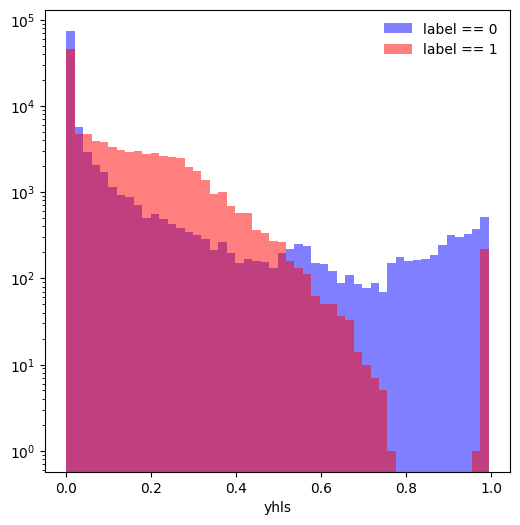

In [29]:
y_hls_sig = y_hls[ (label_test > 0 ) ]
y_hls_bkg = y_hls[ (label_test < 1) ]

plt.figure(figsize=(6,6))
plt.hist(y_hls_bkg,log=True,bins=50,label='label == 0',alpha=0.5,color='blue')
plt.hist(y_hls_sig,log=True,bins=50,label='label == 1',alpha=0.5,color='red')
plt.legend().get_frame().set_alpha(0)
plt.xlabel('yhls')
plt.show()

# Create the Vivado HLS project and do C simulation

In [16]:
# This requires the environment variable for Xilinx Vivado being included.
# For instance, you need to run:
# source /tools/Xilinx/Vivado/2019.2/settings64.sh
# Since we set csim and cosim as True to start simulation, it takes few min.
hls_model.build(synth=True,csim=True,cosim=True)

Project myproject_prj does not exist. Rerun "hls4ml build -p my_model_1/hls4ml_prj".


sh: vivado_hls: command not found


In [17]:
# The Vivado HLS project will be created
hls4ml.report.read_vivado_report('my_model_1/hls4ml_prj')


Project myproject_prj does not exist. Rerun "hls4ml build -p my_model_1/hls4ml_prj".
